
<style>
    .rtl-text {
        direction: rtl;
        text-align: right;
        line-height: 1.5; /* تنظیم ارتفاع خطوط */
    }
</style>
<div class="rtl-text">
الگوریتم K-means یک الگوریتم خوشه‌بندی (clustering) است که برای تقسیم داده‌ها به خوشه‌های مختلف استفاده می‌شود. هدف اصلی این الگوریتم، تقسیم داده‌ها به گروه‌های مشابه بر اساس ویژگی‌های مشترک آن‌ها است.

الگوریتم K-means بر اساس فاصله‌ی اقلیدسی بین نمونه‌ها و مراکز خوشه‌ها عمل می‌کند. عملکرد این الگوریتم به این صورت است:

1. تعیین تعداد K خوشه که قبل از اجرای الگوریتم باید مشخص شود.
2. انتخاب اولیه تصادفی K مرکز خوشه (centroid) از داده‌ها.
3. اختصاص هر نمونه به نزدیک‌ترین مرکز خوشه بر اساس فاصله‌ی اقلیدسی.
4. به‌روزرسانی مراکز خوشه‌ها با محاسبه‌ی میانگین موقعیت نمونه‌های تخصیص داده شده به هر خوشه.
5. تکرار مراحل 3 و 4 تا هنگامی که مراکز خوشه‌ها دیگر تغییر نکنند یا یک شرط توقف دیگر برقرار شود (مثلاً تعداد تکرار مشخصی رسیده شود).
6. در نهایت، داده‌ها به K خوشه تقسیم می‌شوند و خوشه‌های نهایی حاوی داده‌هایی با ویژگی‌های مشابه خواهند بود.

از مزایای الگوریتم K-means می‌توان به سرعت نسبی آن و کاربرد آن در داده‌های بزرگ اشاره کرد. با این حال، این الگوریتم در مواجهه با داده‌هایی که خوشه‌های نامساوی در اندازه و یا چگونگی توزیع آن‌ها دارند، ممکن است به مشکل برخورد کند. همچنین، نتیجه‌ی نهایی الگوریتم ممکن است به مرکز خوشه‌ها بستگی داشته باشد و بستگی به انتخاب اولیه مراکز، نتایج متفاوتی می‌تواند داشته باشد.
</div>


In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import random


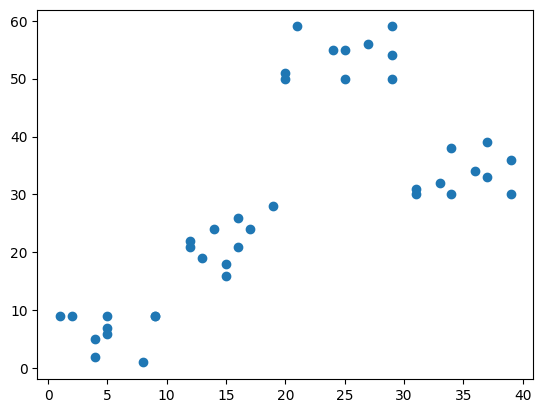

In [3]:
x = [random.randrange(0, 10) for i in range(10)]
x += ([random.randrange(10, 20) for i in range(10)])
x += ([random.randrange(20, 30) for i in range(10)])
x += ([random.randrange(30, 40) for i in range(10)])
y = [random.randrange(0, 10) for i in range(10)]
y += ([random.randrange(15, 30) for i in range(10)])
y += ([random.randrange(50, 60) for i in range(10)])
y += ([random.randrange(30, 40) for i in range(10)])
plt.scatter(x, y)
plt.show()


c:\Users\ali\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ali\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ali\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ali\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it 

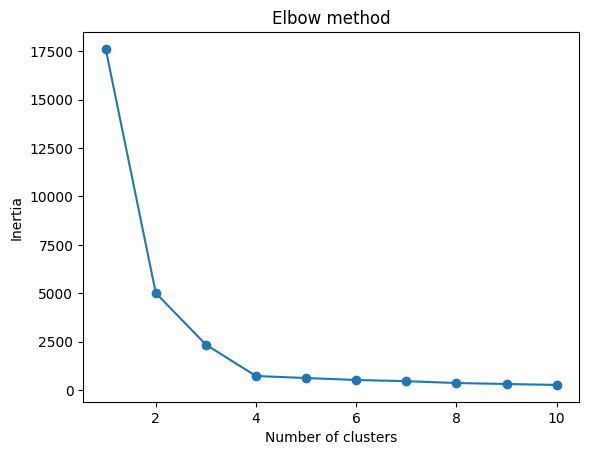

In [4]:
data = list(zip(x, y))
inertias = []
for i in range(1, 11):
    kMeans = KMeans(n_clusters=i)
    kMeans.fit(data)
    inertias.append(kMeans.inertia_)


plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


c:\Users\ali\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ali\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


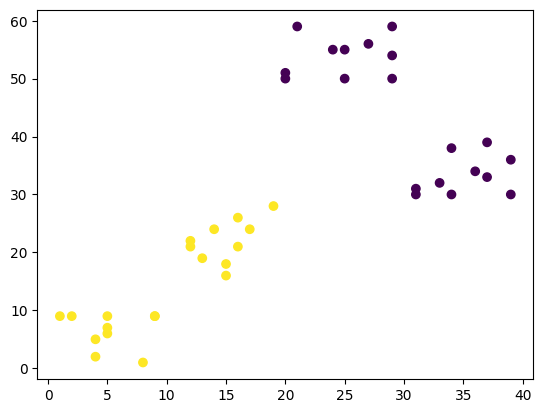

In [13]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()



<style>
    .rtl-text {
        direction: rtl;
        text-align: right;
        line-height: 1.5; /* تنظیم ارتفاع خطوط */
    }
</style>
<div class="rtl-text">
روش سیلوئت (Silhouette method) یکی از روش‌های استفاده شده برای تعیین تعداد بهینه خوشه‌ها در الگوریتم K-means است. این روش بر اساس معیار سیلوئت، که یک اندازه‌گیری از انطباق داخلی و جدایی خارجی داده‌ها در خوشه‌بندی است، عمل می‌کند.

برای هر نمونه در خوشه‌بندی، مقدار سیلوئت محاسبه می‌شود که شامل دو عامل است: سیلوئت داخلی (Silhouette coefficient) و سیلوئت جدایی (Silhouette separation).

- سیلوئت داخلی برای هر نمونه در خوشه، میزان شباهت آن نمونه با سایر نمونه‌های هم‌خوشه را نشان می‌دهد. برای هر نمونه، سیلوئت داخلی محاسبه می‌شود و برابر با فاصله میانگین نمونه به نمونه‌های هم‌خوشه منهای میانگین فاصله نمونه به نمونه‌های خوشه دیگر است. مقدار سیلوئت داخلی بین -1 تا +1 است. مقدار +1 نشان دهنده شباهت بسیار بالا درون خوشه است، در حالی که مقدار -1 نشان دهنده عدم شباهت است.

- سیلوئت جدایی برای هر نمونه در خوشه، میزان جدایی آن نمونه از نمونه‌های خوشه‌های دیگر را نشان می‌دهد. برای هر نمونه، سیلوئت جدایی محاسبه می‌شود و برابر است با میانگین فاصله نمونه به نمونه‌های خوشه دیگر منهای میانگین فاصله نمونه به نمونه‌های هم‌خوشه. مقدار سیلوئت جدایی بین -1 تا +1 است. مقدار +1 نشان دهنده جدایی بسیار بالا از خوشه‌های دیگر است، در حالی که مقدار -1 نشان دهنده عدم جدایی است.

با جمع‌بندی مقادیر سیلوئت داخلی و جدایی، مقدار سیلوئت کلی برای هر نمونه در خوشه‌بندی محاسبه می‌شود. برای هر خوشه، مقدار میانگین سیلوئت کلی نمونه‌های متعلق به آن خوشه در نظر گرفته می‌شود.

حالا با استفاده از روش سیلوئت، می‌توانیم تعداد بهینه خوشه‌ها را تعیین کنیم. تعداد خوشه‌هایی که مقدار میانگین سیلوئت برای آن‌ها بیشینه می‌شود، به عنوان تعداد بهینه خوشه‌ها در نظر گرفته می‌شود.

برای استفاده از روش سیلوئت در پیاده‌سازی الگوریتم K-means در پایتون، می‌توانید از کتابخانه scikit-learn استفاده کنید و پس از اجرای خوشه‌بندی K-means، مقدار میانگین سیلوئت را بررسی کنید و تعداد بهینه خوشه‌ها را مشخص کنید.
</div>

c:\Users\ali\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ali\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ali\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ali\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it 

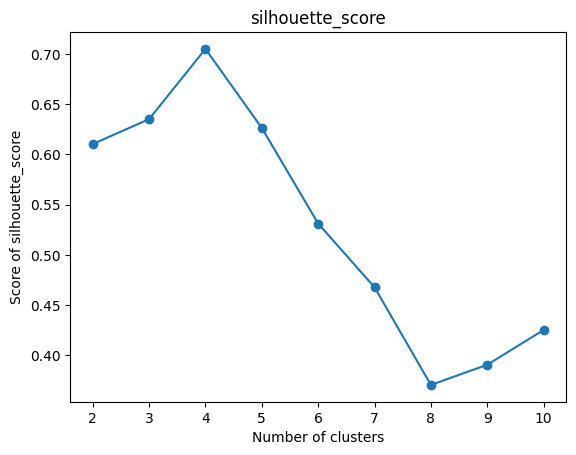

In [16]:
score = []
for i in range(2, 11):
    kMeans = KMeans(n_clusters=i)
    kMeans.fit(data)
    labels = kMeans.labels_
    score.append([silhouette_score(data, labels)])
plt.plot(range(2, 11), score, marker='o')
plt.title('silhouette_score')
plt.xlabel('Number of clusters')
plt.ylabel('Score of silhouette_score')
plt.show()


<style>
    .rtl-text {
        direction: rtl;
        text-align: right;
        line-height: 1.5; /* تنظیم ارتفاع خطوط */
    }
</style>
<div class="rtl-text">
روش دیویس-بولدینگ (Davies-Bouldin) یک معیار ارزیابی معروف در حوزه خوشه‌بندی است که برای اندازه‌گیری کیفیت خوشه‌بندی و تعداد بهینه خوشه‌ها استفاده می‌شود. این معیار در سال 1979 توسط دیویس و بولدینگ معرفی شد.

روش دیویس-بولدینگ بر اساس میزان همبستگی و جداپذیری خوشه‌ها ارزیابی می‌شود. همبستگی میان داده‌های درون یک خوشه و جداپذیری بین خوشه‌ها نشان‌دهنده کیفیت خوشه‌بندی است. هدف اصلی در این روش، یافتن خوشه‌بندی‌ای است که خوشه‌ها درونی و بین‌خوشه‌ای متمایزی داشته باشند.

برای محاسبه معیار دیویس-بولدینگ، ابتدا خوشه‌بندی را با استفاده از یک الگوریتم خوشه‌بندی انجام می‌دهیم. سپس برای هر خوشه، دو عامل را محاسبه می‌کنیم:

1. میانگین فاصله بین نمونه‌های خوشه داخلی: این معیار میزان همبستگی بین نمونه‌های هر خوشه را نشان می‌دهد. هر چه فاصله بین نمونه‌های هر خوشه کمتر باشد، همبستگی بیشتری درون خوشه وجود دارد.

2. میانگین فاصله بین مراکز خوشه‌ها: این معیار میزان جداپذیری بین خوشه‌ها را نشان می‌دهد. هر چه فاصله بین مراکز خوشه‌ها بیشتر باشد، جداپذیری بیشتری بین خوشه‌ها وجود دارد.

سپس برای هر خوشه، معیار دیویس-بولدینگ را محاسبه می‌کنیم:

DB = (1 / k) * Σ ((R_i + R_j) / D(C_i, C_j))

در این فرمول، k تعداد خوشه‌ها است. R_i و R_j میانگین فاصله بین نمونه‌های خوشه i و j هستند. D(C_i, C_j) نشان‌دهنده فاصله بین مراکز خوشه‌ها i و j است.

با محاسبه مقدار دیویس-بولدینگ برای مجموعه‌های خوشه‌بندی با تعداد خوشه‌های مختلف، می‌توانیم تعداد بهینه خوشه‌ها را با توجه به کمینه بودن این معیار انتخاب کنیم. تعدادی که مقدار دیویس-بولدینگ برای آن کمینه است، معمولاً بهترین تعداد خوشه‌ها را نشان می‌دهد.
</div>

c:\Users\ali\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ali\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ali\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ali\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it 

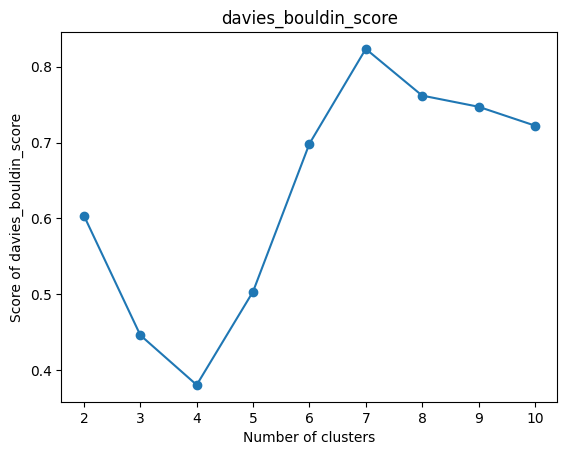

In [17]:
from sklearn.metrics import davies_bouldin_score

score = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    labels = kmeans.labels_
    score.append([davies_bouldin_score(data, labels)])
plt.plot(range(2,11),score,marker='o')
plt.title('davies_bouldin_score')
plt.xlabel('Number of clusters')
plt.ylabel('Score of davies_bouldin_score')
plt.show()